### DP, A2, PTAS and FPTAS Approximation for Knapsack Problems

The given Algorithms take instances of a Knapsack Problem or a Simplified Knapsack Problem through function parameters:
Simplified Knapsack Problems don't take an argument for Rewards. PTAS and FPTAS take an additional argument to limit the error.

$
Capacity: b \in \mathbf{N} \\
Weights: w_{0},...,w_{n-1},w_{i} \in \{1,...,b\} \\
Reward: p_{0},...,p_{n-1},p_{i} \in \mathbf{N}\\
Error: 0 < \epsilon < 1
$

Algorithms return a set of indexes

$
I \subseteq \{0,...,n-1\} \rightarrow \sum_{j \in I} w_{j} \leq b, \sum_{j \in I} p_{j} \rightarrow max
$

In [70]:
import random
import numpy as np
from functools import reduce
import itertools
import time
import pandas as pd
import matplotlib.pyplot as plt

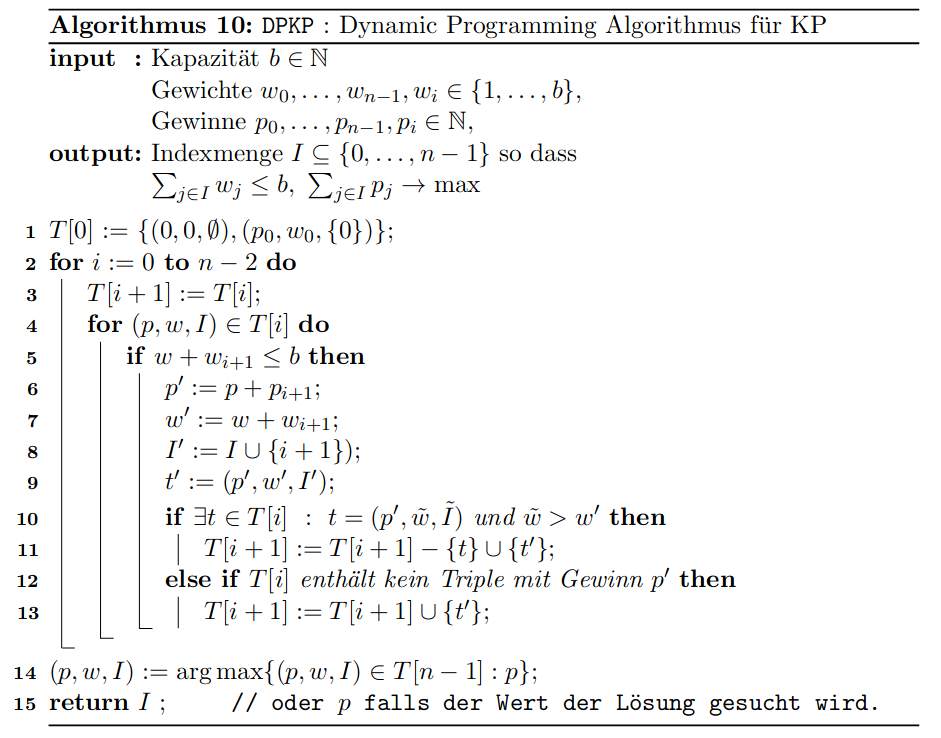

In [4]:
def dpkp(b, w, p):
    n = len(w)
    T = [[(0,0, set()),(p[0], w[0], {0})]]
    for i in range(0,n-1):
        T.append(T[i].copy())
        for item in T[i]:
            tmp_p = item[0]
            tmp_w = item[1]
            tmp_I = item[2]
            if tmp_w + w[i+1] <= b:
                new_p = tmp_p + p[i+1]
                new_w = tmp_w + w[i+1]
                new_I = tmp_I.union({i+1})
                new_triple = (new_p, new_w, new_I)
                if reduce(lambda x, y: x or y, [(t[0]==new_p)and(t[1] > new_w) for t in T[i]]):
                    triple = [t for t in T[i] if (t[0]==new_p) and (t[1] > new_w)][0]
                    if triple in T[i+1]: T[i+1].remove(triple)
                    if new_triple in T[i+1]: T[i+1].remove(new_triple)
                else:
                    T[i+1].append(new_triple)
    ret = max(T[len(T)-1], key = lambda triple: triple[0])
    I = ret[2]
    return ret

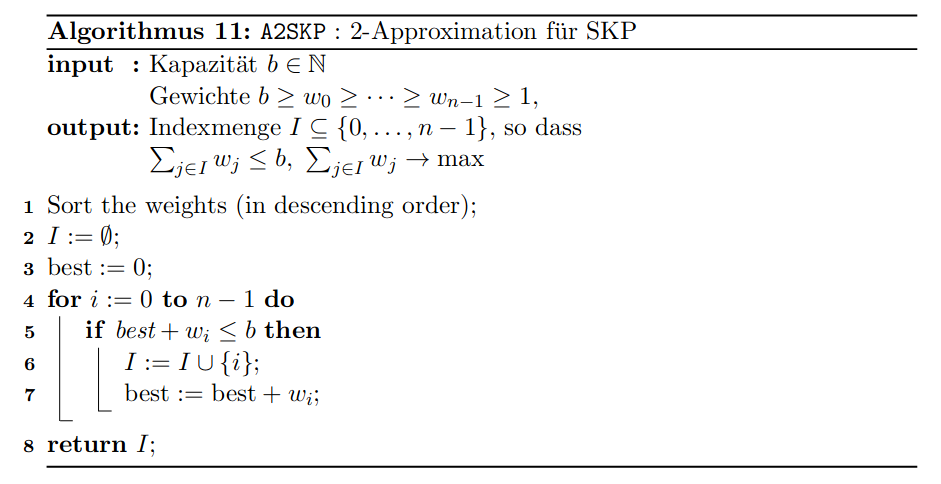

In [5]:
def a2skp(b, w):
    w = w.copy()
    w = [(w[i],i) for i in range(len(w))]
    w.sort(reverse=True, key = lambda tup: tup[0])
    I = set()
    best = 0
    for i in range(len(w)):
        if best + w[i][0] <= b:
            I.add(w[i][1])
            best += w[i][0]
    I = list(I)
    I.sort()
    return (best, set(I))

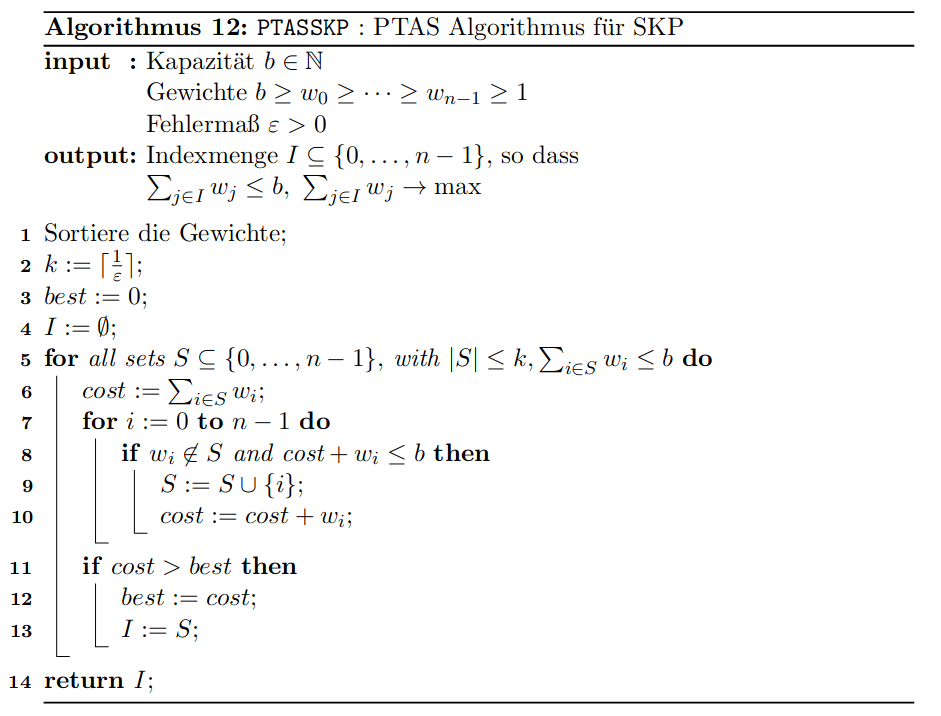

In [6]:
def ptasskp(b, w, epsilon):
    n = len(w)
    w = w.copy()
    w = [(w[i],i) for i in range(n)]
    w.sort(key= lambda tup: tup[0])
    k = int(round((1/epsilon)+0.5,0))
    best = 0
    I = set()
    for p in range(k):
        for S in itertools.combinations([j for j in range(n)],p):
            S = list(S)
            S_ret = [w[s][1] for s in S]
            cost = sum([w[l][0] for l in S])
            if cost > b: continue
            for i in range(n):
                if (not(w[i][0] in S)) and (cost + w[i][0] <= b):
                    S_ret.append(w[i][1])
                    cost = cost + w[i][0]
            if cost > best:
                best = cost
                I = S_ret
        if best == b: break #for improved performance
    I.sort()
    return (best, set(I))

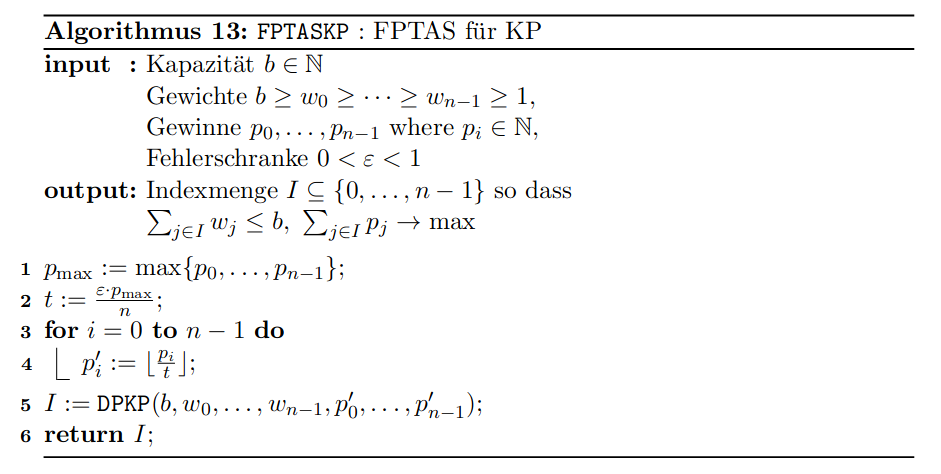

In [7]:
def fptaskp(b, w, p, epsilon):
    p_old = p
    p = p.copy()
    n = len(w)
    p_max = max(p)
    t = (epsilon * p_max)/n
    for i in range(n):
        p[i] = p[i]//t
    I = dpkp(b,w,p)
    p_new = sum([p_old[i] for i in I[2]])
    I = (p_new, I[1], I[2])
    return I

## Analysis
Generate random knapsack problems with a limited size for runtime limitation. Test generated problems with the implementations of the algorithms

In [8]:
def generator(upper_bound_b,upper_bound_n):
    n = upper_bound_n
    b = upper_bound_b
    w = [random.randint(a=0, b=b) for i in range(n)]
    p = [random.randint(a=1, b=100) for i in range(n)]
    epsilon = random.random()
    return b, w, p, epsilon

In [9]:
def show_problem(b,w,p,epsilon):
    print(f'Upper Bound of Knapsack: {b}')
    print(f'Weights: {w}')
    print(f'Rewards: {p}')
    print(f'Error: {epsilon}')

In [10]:
def test():
    pass

In [22]:
#example for test
b, w, p, epsilon = generator(1000, 150)
epsilon = 0.0001
show_problem(b,w,p,epsilon)

Upper Bound of Knapsack: 1000
Weights: [443, 704, 249, 731, 943, 959, 579, 555, 261, 76, 265, 754, 661, 899, 188, 16, 638, 147, 102, 144, 755, 783, 867, 542, 973, 315, 949, 48, 646, 545, 332, 239, 764, 53, 796, 942, 528, 164, 870, 569, 245, 89, 281, 501, 241, 300, 44, 664, 767, 553, 953, 603, 493, 600, 351, 398, 584, 621, 510, 912, 648, 956, 370, 466, 441, 994, 507, 767, 482, 132, 822, 895, 836, 762, 591, 626, 664, 308, 50, 723, 816, 620, 516, 250, 207, 281, 720, 836, 826, 990, 947, 203, 979, 116, 915, 606, 400, 548, 235, 25, 231, 542, 73, 721, 408, 898, 899, 8, 305, 461, 660, 10, 21, 146, 777, 845, 867, 207, 383, 679, 367, 513, 606, 615, 528, 119, 653, 7, 582, 226, 96, 237, 497, 316, 574, 290, 37, 933, 632, 256, 212, 51, 36, 385, 604, 423, 870, 566, 564, 228]
Rewards: [80, 40, 16, 77, 48, 64, 27, 2, 11, 90, 89, 87, 57, 12, 65, 94, 19, 53, 15, 5, 40, 37, 11, 81, 93, 14, 40, 16, 27, 34, 95, 89, 10, 80, 86, 40, 29, 10, 47, 83, 22, 54, 17, 32, 88, 68, 64, 74, 59, 81, 30, 89, 88, 35, 13, 9

In [23]:
print(f'DPKP:    {dpkp(b,w,p)}')
print(f'FPTASKP: {fptaskp(b,w,p,epsilon)}')
print(f'A2SKP:   {a2skp(b,w)}')
print(f'PTASSKP: {ptasskp(b,w,epsilon)}')

DPKP:    (928, 989, {99, 69, 102, 136, 9, 41, 107, 46, 15, 111, 112, 125, 30, 127})
FPTASKP: (928, 989, {99, 69, 102, 136, 9, 41, 107, 46, 15, 111, 112, 125, 30, 127})
A2SKP:   (994, {65})
PTASSKP: (1000, {33, 130, 99, 102, 136, 9, 41, 107, 77, 46, 15, 78, 111, 112, 141, 142, 127})


In [236]:
# initializing for epsilon test
epsilon = [e for e in np.arange(0.001, 0.1, 0.01, dtype=float)]+[e for e in np.arange(0.1, 1, 0.1, dtype=float)]+[e for e in np.arange(1, 10, 1, dtype=float)]
n = 100
tests = 10
data_epsilon =[]
upper_bound_b = 1000

for test in range(tests):
    print(f'Getting results for Knapsack {test}')
    b, w, p, ignore = generator(upper_bound_b, n)
    # generate data for varying epsilon
    print('   Generating Data: ')
    for e in range(len(epsilon)):
        if (e)%((len(epsilon)//10)) == 0:
            print(f'      {int((e/len(epsilon))*100)} % Data generated.')
        t_fptas = time.time()
        fptas = fptaskp(b,w,p,epsilon[e])
        t_fptas = time.time() - t_fptas
        t_ptas = time.time()
        ptas = ptasskp(b,w,epsilon[e])
        t_ptas = time.time() - t_ptas
        data_epsilon.append((test, n, epsilon[e], upper_bound_b, fptas[0], fptas[1], t_fptas, ptas[0], t_ptas))
        
    
    

Getting results for Knapsack 0
   Generating Data: 
      0 % Data generated.
      7 % Data generated.
      14 % Data generated.
      21 % Data generated.
      28 % Data generated.
      35 % Data generated.
      42 % Data generated.
      50 % Data generated.
      57 % Data generated.
      64 % Data generated.
      71 % Data generated.
      78 % Data generated.
      85 % Data generated.
      92 % Data generated.
Getting results for Knapsack 1
   Generating Data: 
      0 % Data generated.
      7 % Data generated.
      14 % Data generated.
      21 % Data generated.
      28 % Data generated.
      35 % Data generated.
      42 % Data generated.
      50 % Data generated.
      57 % Data generated.
      64 % Data generated.
      71 % Data generated.
      78 % Data generated.
      85 % Data generated.
      92 % Data generated.
Getting results for Knapsack 2
   Generating Data: 
      0 % Data generated.
      7 % Data generated.
      14 % Data generated.
      21 % Da

In [209]:
# initializing for n test
N = [n for n in range(5,1300)]
epsilon = 0.5
data_n = []
print('   Generating Data: ')
for n in N:
    b, w, p, ignore = generator(upper_bound_b, n)
    if ((n-min(N)+1)%(len(N)//100) == 0):
        print(f'      {int(((n-min(N))/len(N))*100)} % Data generated.')
    if ((n-min(N)+1)%(len(N)//260) == 0) and (n < 150):
        time_dpkp = time.time()
        dpkp(b,w,p)
        time_dpkp = time.time() - time_dpkp
    else: 
        time_dpkp = 0
    if ((n-min(N)+1)%(len(N)//260) == 0) and (n < 130):
        time_fptas = time.time()
        fptaskp(b,w,p,epsilon)
        time_fptas = time.time() - time_fptas
    else: 
        time_fptas = 0
    time_a2 = time.time()
    a2skp(b,w)
    time_a2 = time.time() - time_a2
    time_ptas = time.time()
    ptasskp(b,w,epsilon)
    time_ptas = time.time() - time_ptas
    data_n.append((n ,epsilon, time_dpkp, time_fptas, time_a2, time_ptas))


   Generating Data: 
      0 % Data generated.
      1 % Data generated.
      2 % Data generated.
      3 % Data generated.
      4 % Data generated.
      5 % Data generated.
      6 % Data generated.
      7 % Data generated.
      8 % Data generated.
      9 % Data generated.
      10 % Data generated.
      11 % Data generated.
      11 % Data generated.
      12 % Data generated.
      13 % Data generated.
      14 % Data generated.
      15 % Data generated.
      16 % Data generated.
      17 % Data generated.
      18 % Data generated.
      19 % Data generated.
      20 % Data generated.
      21 % Data generated.
      22 % Data generated.
      23 % Data generated.
      24 % Data generated.
      24 % Data generated.
      25 % Data generated.
      26 % Data generated.
      27 % Data generated.
      28 % Data generated.
      29 % Data generated.
      30 % Data generated.
      31 % Data generated.
      32 % Data generated.
      33 % Data generated.
      34 % Data g

In [238]:
#making data frames

df_epsilon = pd.DataFrame(data_epsilon, columns = ['test', 'n', 'epsilon', 'b', 'FPTASKP_profit', 'FPTASKP_weight', 'FPTAS_time', 'PTASKP_weight', 'PTASKP_time'])
df_n = pd.DataFrame(data_n, columns=['n', 'epsilon', 'DPKP_time', 'FPTAS_time', 'A2_time', 'PTAS_time'])



### Plots

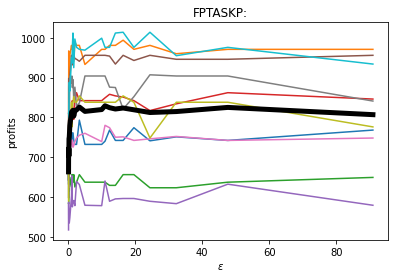

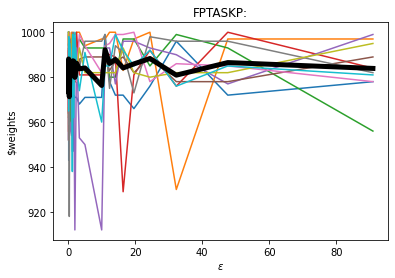

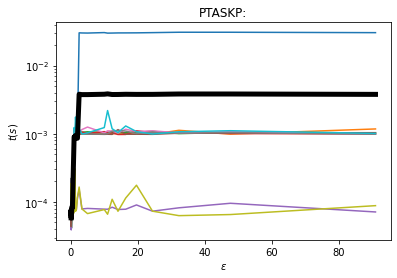

In [330]:
plt.title('FPTASKP:')
for test in range(tests):
    plt.plot(1/df_epsilon.loc[df_epsilon.epsilon > 0.01].loc[df_epsilon.test == test].epsilon, df_epsilon.loc[df_epsilon.epsilon > 0.01].loc[df_epsilon.test == test].FPTASKP_profit)
    
mean = []
for epsilon in range(len(df_epsilon.loc[df_epsilon.test == test].loc[df_epsilon.epsilon > 0.01].epsilon)):
    mean.append(np.mean([df_epsilon.loc[df_epsilon.test == test].loc[df_epsilon.epsilon > 0.01].FPTASKP_profit.values[epsilon] for test in range(tests)]))
plt.plot(1/df_epsilon.loc[df_epsilon.test == test].loc[df_epsilon.epsilon > 0.01].epsilon,mean, color='black', linewidth = 5.0)
plt.xlabel('$\epsilon$')
#plt.yscale('log')

plt.ylabel('profits')
plt.show()

plt.title('FPTASKP:')
for test in range(tests):
    plt.plot(1/df_epsilon.loc[df_epsilon.epsilon > 0.01].loc[df_epsilon.test == test].epsilon, df_epsilon.loc[df_epsilon.epsilon > 0.01].loc[df_epsilon.test == test].FPTASKP_weight)
    
mean = []
for epsilon in range(len(df_epsilon.loc[df_epsilon.test == test].loc[df_epsilon.epsilon > 0.01].epsilon)):
    mean.append(np.mean([df_epsilon.loc[df_epsilon.test == test].loc[df_epsilon.epsilon > 0.01].FPTASKP_weight.values[epsilon] for test in range(tests)]))
plt.plot(1/df_epsilon.loc[df_epsilon.test == test].loc[df_epsilon.epsilon > 0.01].epsilon,mean, color='black', linewidth = 5.0)
plt.xlabel('$\epsilon$')
#plt.yscale('log')

plt.ylabel('$weights')
plt.show()





plt.title('PTASKP:')
for test in range(tests):
    plt.plot(1/df_epsilon.loc[df_epsilon.test == test].loc[df_epsilon.epsilon > 0.01].epsilon, df_epsilon.loc[df_epsilon.test == test].loc[df_epsilon.epsilon > 0.01].PTASKP_time)
mean = []
for epsilon in range(len(df_epsilon.loc[df_epsilon.test == test].loc[df_epsilon.epsilon > 0.01].epsilon)):
    mean.append(np.mean([df_epsilon.loc[df_epsilon.test == test].loc[df_epsilon.epsilon > 0.01].PTASKP_time.values[epsilon] for test in range(tests)]))
plt.plot(1/df_epsilon.loc[df_epsilon.test == test].loc[df_epsilon.epsilon > 0.01].epsilon,mean, color='black', linewidth = 5.0)
plt.xlabel('$\epsilon$')
plt.ylabel('$t (s)$')
plt.yscale('log')

plt.show()

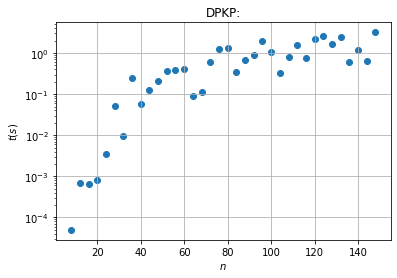

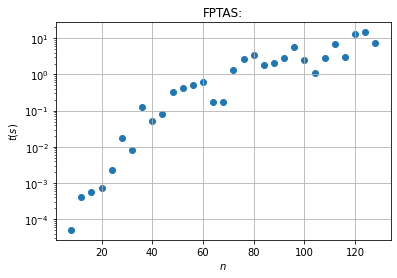

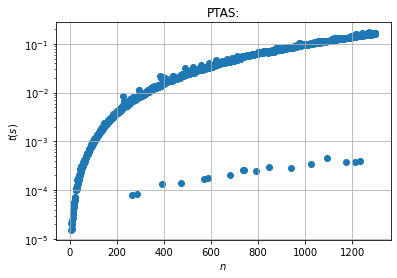

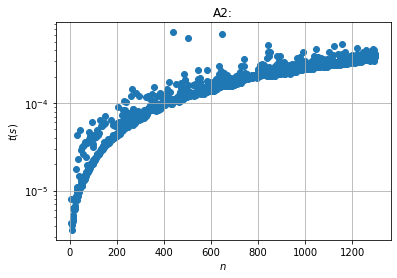

In [333]:
for s in ['DPKP', 'FPTAS', 'PTAS', 'A2']:
    plt.title(s+':')
    plt.scatter(df_n.loc[df_n[s+'_time'] != 0].n,df_n.loc[df_n[s+'_time'] != 0][s+'_time'])
    #plt.plot(df_n.loc[df_n[s+'_time'] != 0].n ,df_n.loc[df_n[s+'_time'] != 0][s+'_time'].rolling(3).mean(), color='orange')
    plt.xlabel('$n$')
    plt.ylabel('$t (s)$')
    plt.grid(True)
    plt.yscale('log')
    plt.show()